In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

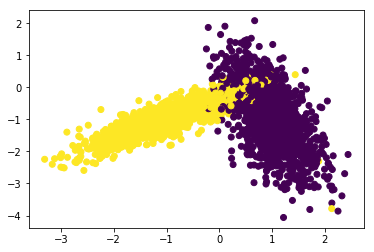

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [4]:
from sklearn.metrics import accuracy_score

#Function to generate 10 random values(parameters) 
def randomn_params(params):
    param=random.sample(range(1,params),10)
    param.sort()
    return param

def RandomsearchCV(x_train,y_train,classifier,param_range,folds):
    # List to store the train and test scores
    trainscores=[]
    testscores=[]
    #Dividing the points into groups called folds for cross-validation
    dividing_by_folds=int(len(x_train)/folds)
    
    #Looping through each hyper-parameter k
    for k in tqdm(params_list['n_neighbors']):
        train_folds=[]
        test_folds=[]
        
        for j in range(0,folds):
            # Looping to get the required points for each fold CV
            train_points=list(set(list(range((dividing_by_folds*j),(dividing_by_folds*(j+1))))))
            # Separating the test points from the set of train points for each fold
            test_points=list(set(list(range(1,len(x_train))))-set(train_points))
            
            # selecting the data points based on the train_indices and test_indices
            X_train=x_train[train_points]
            Y_train=y_train[train_points]
            X_test=x_train[test_points]
            Y_test=y_train[test_points]
            
            # Fitting the training data points into the model
            classifier.n_neighbors=k
            classifier.fit(X_train,Y_train)
            
            #Predicting the accuracy of both train and test data points
            Y_predict=classifier.predict(X_test)
            test_folds.append(accuracy_score(Y_test,Y_predict))
            Y_predict1=classifier.predict(X_train)
            train_folds.append(accuracy_score(Y_train,Y_predict1))
         
        #Adding the scores of each fold in training and test datasets for all hyper-parameter and storing them
        trainscores.append(np.mean(np.array(train_folds)))
        testscores.append(np.mean(np.array(test_folds)))
    
    return trainscores,testscores
            
            

{'n_neighbors': [4, 6, 7, 10, 11, 13, 14, 21, 31, 34]}


100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  6.28it/s]


<function matplotlib.pyplot.show(*args, **kw)>

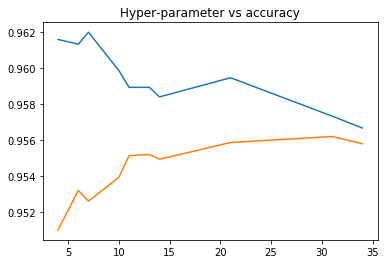

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


n=KNeighborsClassifier()

params=50
params_list={'n_neighbors':randomn_params(params)}
folds=3

print(params_list)
trainscores,testscores=RandomsearchCV(X_train,y_train,n,params_list,folds)

plt.plot(params_list['n_neighbors'],trainscores,label='train data')
plt.plot(params_list['n_neighbors'],testscores,label='test data')
plt.title('Hyper-parameter vs accuracy')
plt.legend
plt.show

In [10]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

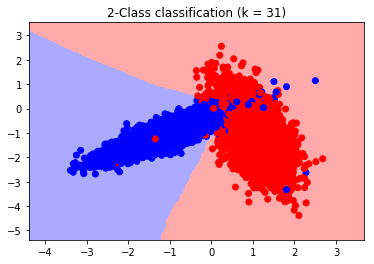

In [14]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 31)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)